In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from warnings import filterwarnings
filterwarnings('ignore')

#Ans 1

In [ ]:
import nltk
import random
import string
import re
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
import wordcloud

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


In [ ]:
#Creating a dataframe with the texts
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [ ]:
inaugural_speech

,president,text
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


##Ans 1.1

### Number of Characters


In [ ]:
# including spaces
inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech[['text','char_count']]

,text,char_count
1941-Roosevelt,On each national day of inauguration since 178...,7571
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


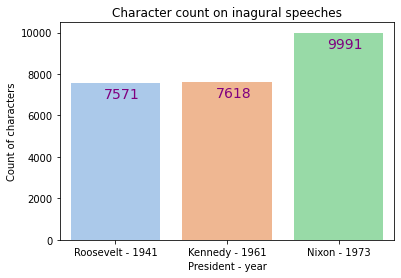

In [ ]:
#Presenting the visualization of number of characters for better understanding
plt.figure(figsize=(6,4))
ax = sns.barplot(y='char_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Character count on inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of characters')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-750), fontsize = 14, color= 'purple')
plt.show()

###Number of words


In [ ]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech[['text','word_count']]

,text,word_count
1941-Roosevelt,On each national day of inauguration since 178...,1323
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


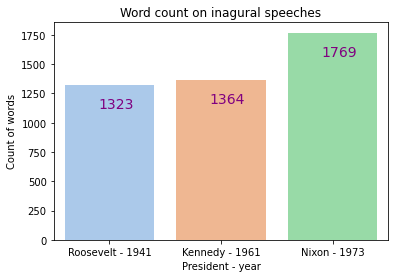

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.barplot(y='word_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Word count on inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-200), fontsize = 14, color = 'purple')
plt.show()

###Number of sentences


In [ ]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech[['text','sents_count']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,sents_count
1941-Roosevelt,On each national day of inauguration since 178...,68
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",52
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",68


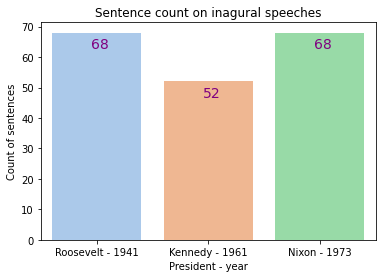

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.barplot(y='sents_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Sentence count on inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of sentences')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.35,
                     p.get_height()-5), fontsize = 14, color= 'purple')
plt.show()

##Ans 1.2

In [ ]:
#Lower Case conversion
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [ ]:
#Removal of punctuations
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [ ]:
#Removal of stopwords 

from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
inaugural_speech['text']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1941-Roosevelt    national day inauguration since 1789 people re...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [ ]:
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding lifes ideals measured material thi

In [ ]:
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)

['vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival

In [ ]:
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)

['mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitation

In [ ]:
#Performing Stemming for better cleaning of the text
from nltk.stem import PorterStemmer
st = PorterStemmer()
inaugural_speech['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

1941-Roosevelt    nation day inaugur sinc 1789 peopl renew sens ...
1961-Kennedy      vice presid johnson mr speaker mr chief justic...
1973-Nixon        mr vice presid mr speaker mr chief justic sena...
Name: text, dtype: object

##Ans 1.3

In [ ]:
#Most common words occurred in 1941-Roosevelt
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:10]
freq

nation       11
know         10
democracy     9
spirit        9
life          8
us            8
people        7
america       7
years         6
freedom       6
dtype: int64

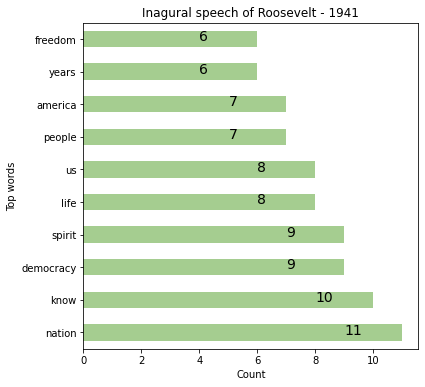

In [ ]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'crest')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')
plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)
plt.show()

###For 1941-Roosevelt I have presented the top 10 most frequent words where I can see the most occurred word is nation which appeared in the speech 11 times. The top 3 most occurred words are nation with 11 times, know with 10 times, democracy and spirit both with 9 times.

In [ ]:
#Most common words occurred in 1961-Kennedy
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:10]
freq

let         16
us          12
sides        8
world        8
pledge       7
new          7
ask          5
citizens     5
nations      5
free         5
dtype: int64

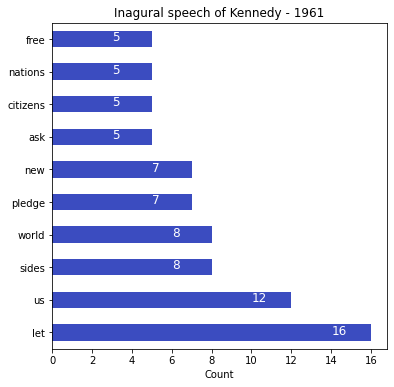

In [ ]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'coolwarm')
plt.title('Inagural speech of Kennedy - 1961')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=12, color = 'white')
plt.show()

###For 1961-Kennedy I have presented the top 10 most frequent words where I can see the most occurred word is let which appeared in the speech 16 times. The top 3 most occurred words are let with 16 times, us with 12 times, sides and world with 8 times.

In [ ]:
#Most common words occurred in 1973-Nixon
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:10]
freq

us                26
let               22
peace             19
world             16
new               15
america           13
responsibility    11
government        10
great              9
home               9
dtype: int64

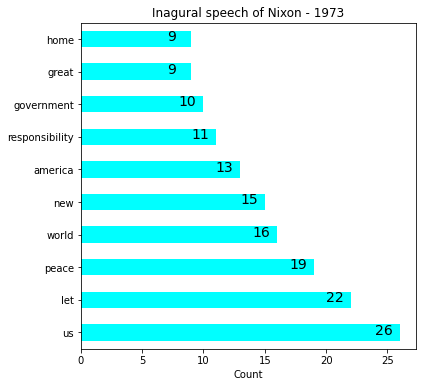

In [ ]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'cool')
plt.title('Inagural speech of Nixon - 1973')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)
plt.show()

###For 1973-Nixon I have presented the top 10 most frequent words where I can see the most occurred word is us which appeared in the speech 26 times. The top 3 most occurred words are us with 26 times, let with 22 times, peace with 19 times.

##Ans 1.4

###Word cloud for 1941-Roosevelt

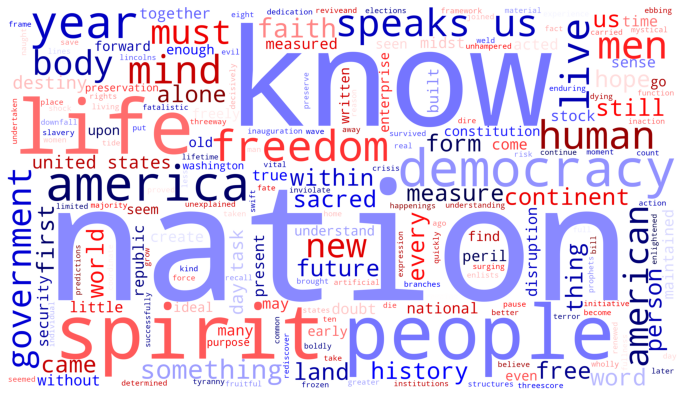

In [ ]:
from wordcloud import WordCloud,STOPWORDS
#new_df=inaugural_speech.iloc[0:1,0]
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      colormap = 'seismic_r',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

###Word cloud for 1961-Kennedy

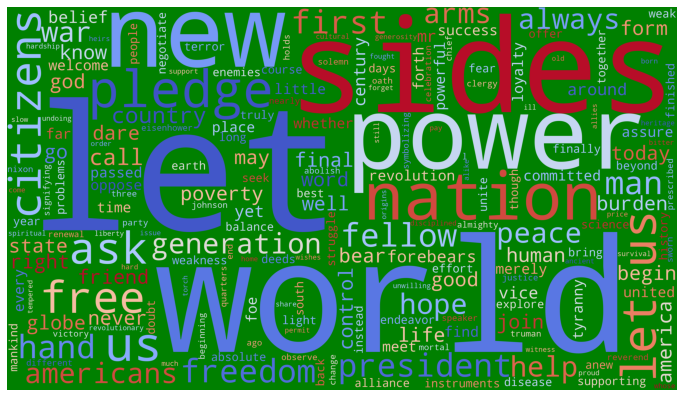

In [ ]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='green',
                      colormap = 'coolwarm',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

###Word cloud for 1973-Nixon

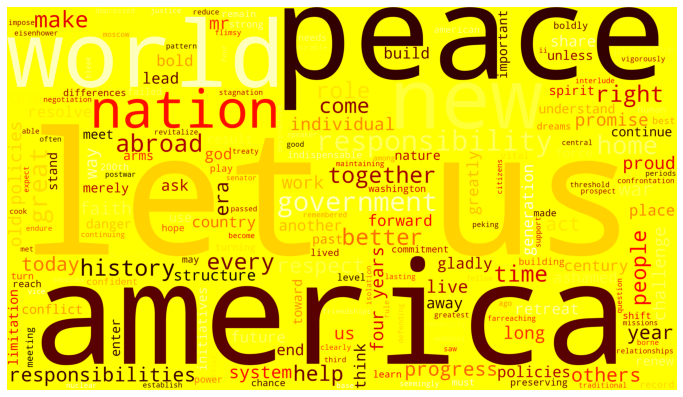

In [ ]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='yellow',
                      colormap = 'hot',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()